In [96]:
from lobster.nulobster import *
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Best fit parameters (PDG updated)
s12sq = 0.297
s23sq = 0.425
s13sq = 0.0215
dm21sq = 7.37e-5
dm32sq = 2.54e-3

# Test mbb function
mbb(0, s12sq, s13sq, s23sq, dm21sq, dm32sq, phi2=0, phi3=0, hierarchy=-1)

0.05000605955440626

In [58]:
# 3sigma parameters interval (PDG updated)
us12sq = 0.354
us23sq = 0.615
us13sq = 0.024
udm21sq = 7.96e-5
udm32sq = 2.66e-3

ds12sq = 0.250
ds23sq = 0.381
ds13sq = 0.019
ddm21sq = 6.93e-5
ddm32sq = 2.42e-3

In [3]:
mbb_range(0, s12sq, s13sq, s23sq, dm21sq, dm32sq, hierarchy=1)

(0.0015293719299414674, 0.003635787980577567)

In [4]:
mbb_range(0, s12sq, s13sq, s23sq, dm21sq, dm32sq, hierarchy=-1)

(0.019472148944345166, 0.04887443866228054)

In [54]:
def plot(s12sq, s13sq, s23sq, dm21sq, dm32sq,
         hierarchy, step=0.005, name='graph', alpha=0.5):
    '''Make a plot for the given parameters.

    :param s12sq: sin^2 theta12
    :param s13sq: sin^2 theta13
    :param s23sq: sin^2 theta23
    :param dm21sq: Delta m21 squared
    :param dm32sq: Delta m32 squared
    :param hierarchy: Positive for normal, negative for inverted
    :returns: A TGraph with the allowed area filled in
    '''
    # Values of m_lightest to evaluate [eV]
    x = np.logspace(-5, 0, 100)

    # Loop over m_lightests to find the mbb range for each
    y = []
    for m in x:
        r = mbb_range(m, s12sq, s13sq, s23sq, dm21sq, dm32sq,
                      hierarchy=hierarchy, step=step)
        y.append(r)

    # Invert to get a tuple of (lower bounds, upper bounds)
    b = [list(t) for t in y]
    
    up = [y[i][0] for i in range(len(y))]
    dw = [y[i][1] for i in range(len(y))]

    #g = ROOT.TGraph(2 * len(x))
    #g.SetName(name)

    ind = np.arange(len(x))
    
    if hierarchy == -1: color = 'r'
    else: color = 'b'
        
    plt.yscale('log')
    plt.xscale('log')
    plt.fill_between(x, up, dw, color=color, alpha=alpha)


# Lobster plot 

(1e-05, 1.0)

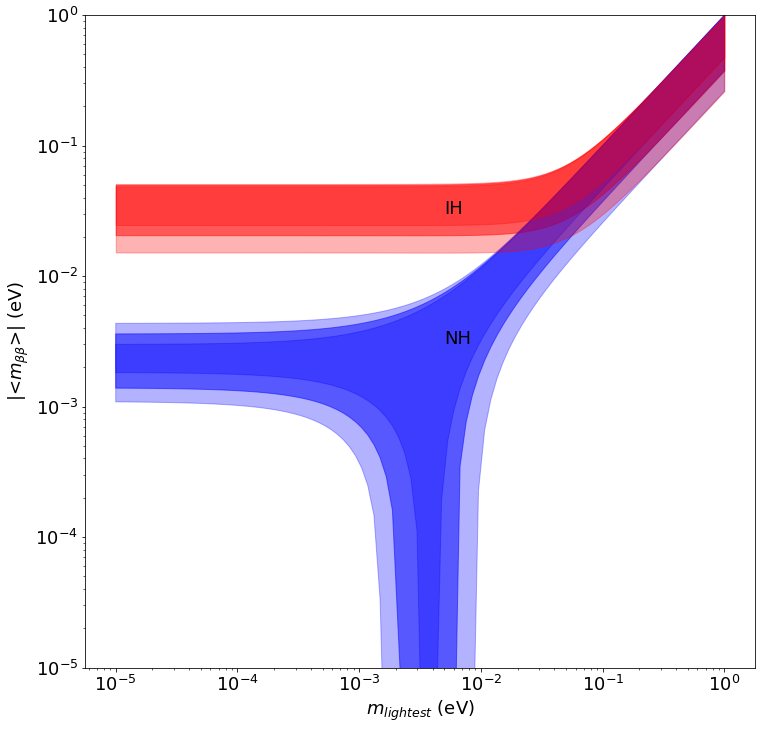

In [67]:
plt.figure(figsize=(12,12))
plot(s12sq, s13sq, s23sq, dm21sq, dm32sq, hierarchy=1, step=0.005)

plot(s12sq, s13sq, s23sq, dm21sq, dm32sq, hierarchy=-1, step=0.005)

# 3sigma CI
plot(us12sq, us13sq, us23sq, udm21sq, udm32sq, hierarchy=1, step=0.005, alpha=0.3)
plot(ds12sq, ds13sq, ds23sq, ddm21sq, ddm32sq, hierarchy=1, step=0.005, alpha=0.3)
plot(us12sq, us13sq, us23sq, udm21sq, udm32sq, hierarchy=-1, step=0.005, alpha=0.3)
plot(ds12sq, ds13sq, ds23sq, ddm21sq, ddm32sq, hierarchy=-1, step=0.005, alpha=0.3)

plt.text(5e-3, 3e-2, 'IH', fontsize =18)
plt.text(5e-3, 3e-3, 'NH', fontsize =18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.ylabel('|<$m_{\\beta \\beta}$>| (eV)', fontsize=18)
plt.xlabel('$m_{lightest}$ (eV)', fontsize=18)

plt.ylim(1e-5, 1e0)

## Scrap box

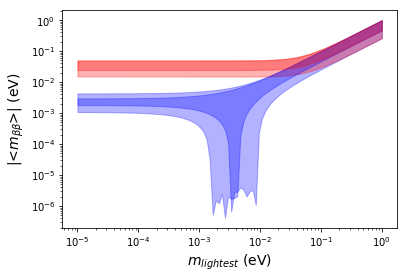

In [63]:

plot(us12sq, us13sq, us23sq, udm21sq, udm32sq, hierarchy=1, step=0.005, alpha=0.3)

plot(us12sq, us13sq, us23sq, udm21sq, udm32sq, hierarchy=-1, step=0.005, alpha=0.3)

plot(ds12sq, ds13sq, ds23sq, ddm21sq, ddm32sq, hierarchy=1, step=0.005, alpha=0.3)

plot(ds12sq, ds13sq, ds23sq, ddm21sq, ddm32sq, hierarchy=-1, step=0.005, alpha=0.3)


In [35]:
step = 0.005
hierarchy = -1
x = np.logspace(-5, 0, 100)

    # Loop over m_lightests to find the mbb range for each
y = []
for m in x:
    r = mbb_range(m, s12sq, s13sq, s23sq, dm21sq, dm32sq,
                  hierarchy=hierarchy, step=step)
    y.append(r)
b = [list(t) for t in y]


up = [b[i][0] for i in range(len(y))]
dw = [b[i][1] for i in range(len(y))]

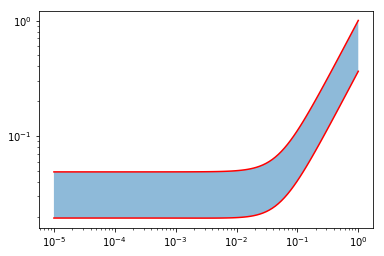

In [36]:
plt.yscale('log')
plt.xscale('log')
plt.fill_between(x, up, dw, alpha=0.5)
plt.plot(x, up, 'r')
plt.plot(x, dw, 'r')

# Now fix $m_{lightest}$ and 3d plot $\alpha_1$ and $\alpha_2$ 

<IPython.core.display.Javascript object>


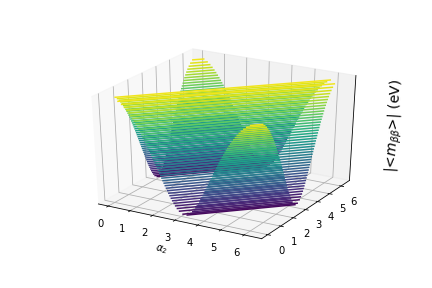

In [115]:
m = 0
step = 200
phi1 = np.linspace(0, 2 * np.pi, step)
phi2 = np.linspace(0, 2 * np.pi, step)

pp1, pp2 = np.meshgrid(phi1, phi1)
MBB = mbb(m, s12sq, s13sq, s23sq, dm21sq, dm32sq, pp1, pp2, 
          hierarchy=1)

%matplotlib notebook
from mpl_toolkits import mplot3d

ax = plt.axes(projection ='3d')
ax.contour3D(pp1, pp2, MBB, 50)
ax.set_xlabel('$\\alpha_1$')
ax.set_ylabel('$\\alpha_2$')
ax.set_zlabel('|<$m_{\\beta \\beta}$>| (eV)', fontsize=14)
ax.set_zscale('log')
plt.show()

In [163]:
def plot3d_majorana(m, ax, hierarchy, step = 200):
    phi1 = np.linspace(0, 2 * np.pi, step)
    phi2 = np.linspace(0, 2 * np.pi, step)

    pp1, pp2 = np.meshgrid(phi1, phi1)
    MBB = mbb(m, s12sq, s13sq, s23sq, dm21sq, dm32sq, pp1, pp2, 
              hierarchy=hierarchy)
    
    if hierarchy == 1: 
        cmap = 'hot'

    elif hierarchy == -1: 
        cmap = 'ocean'
    
    ax.contour3D(pp1, pp2, MBB, 80, cmap=cmap)
    ax.set_xlabel('$\\alpha_1$', fontsize=14)
    ax.set_ylabel('$\\alpha_2$', fontsize=14)
    ax.set_zlabel('|<$m_{\\beta \\beta}$>| (eV)', fontsize=14)
    ax.set_zscale('log')

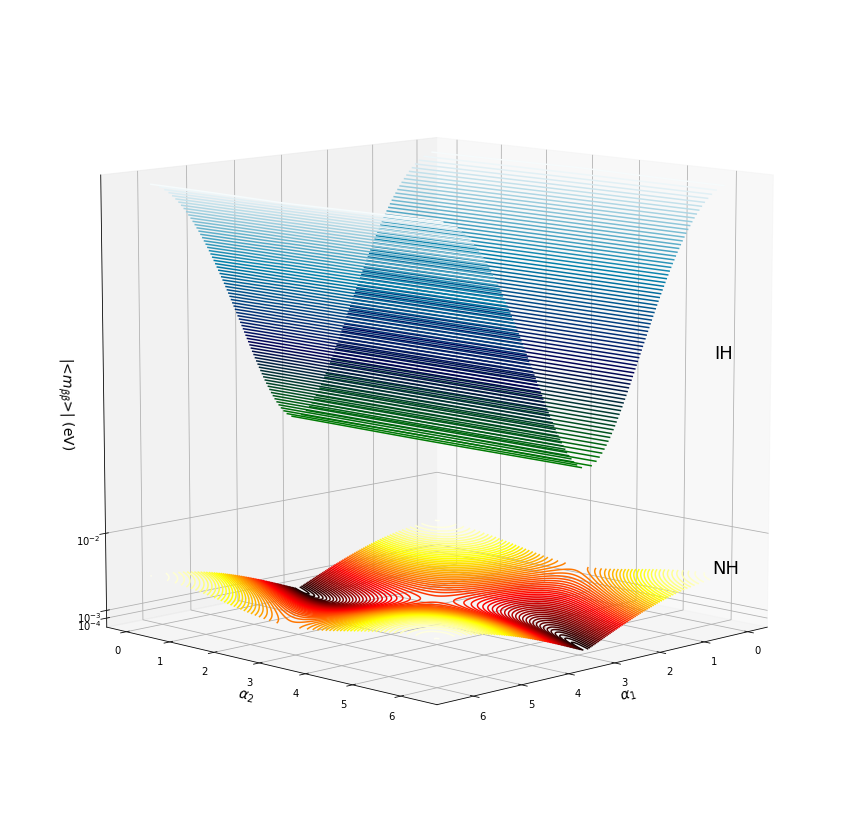

In [190]:
%matplotlib inline
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection ='3d')

plot3d_majorana(m=2e-3, ax = ax, hierarchy = 1)
plot3d_majorana(m=2e-3, ax = ax, hierarchy = -1)
ax.text(0,6, 3e-2, 'IH', fontsize =18)
ax.text(0,6, 5e-3, 'NH', fontsize =18)
# ax.set_zlim(1e-3, 0.5e-1)

ax.view_init(10,45)
plt.show()

In [182]:
ax.get_zlim()

(0.37579490586603526, 1.0000390026050145)

<IPython.core.display.Javascript object>


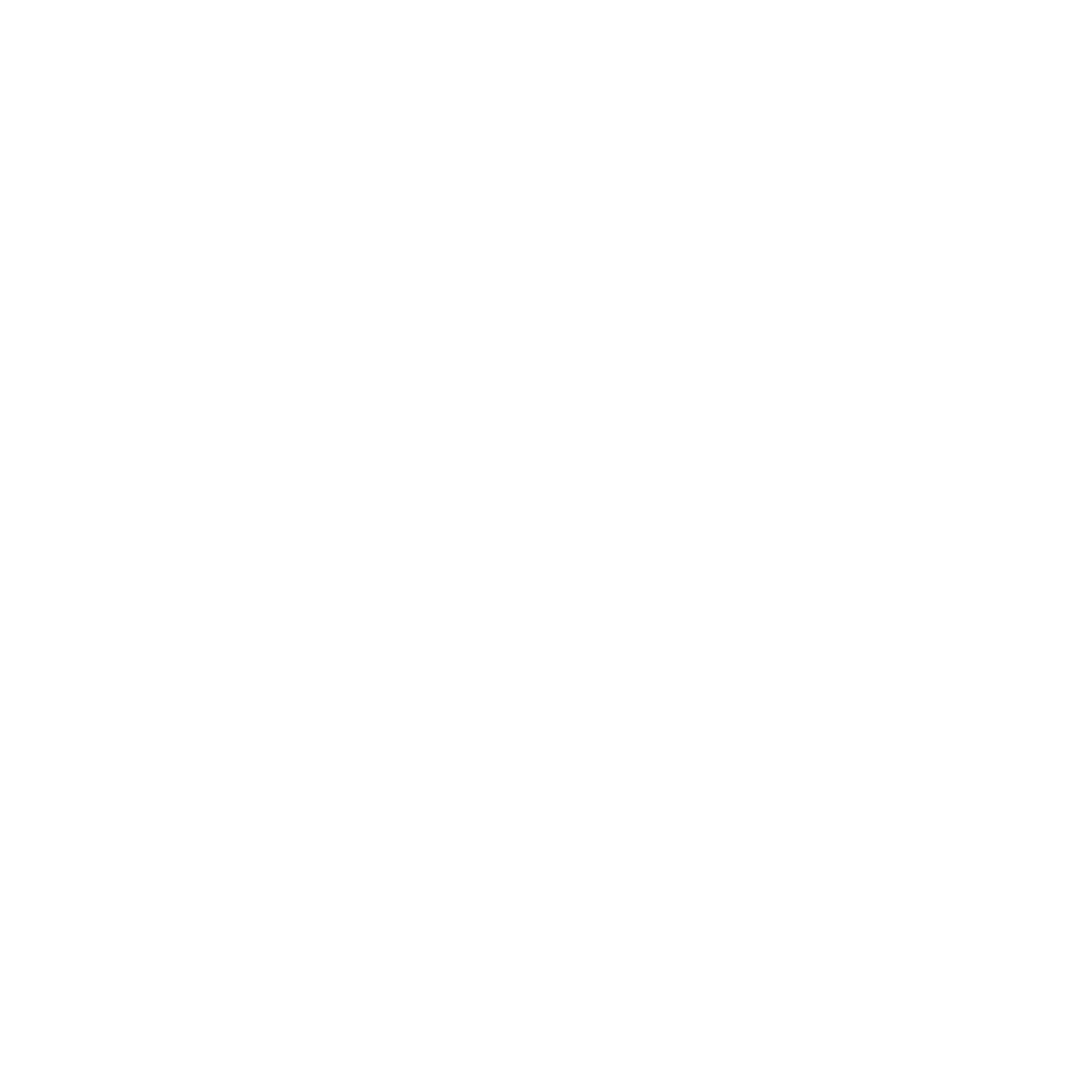

<IPython.core.display.Javascript object>


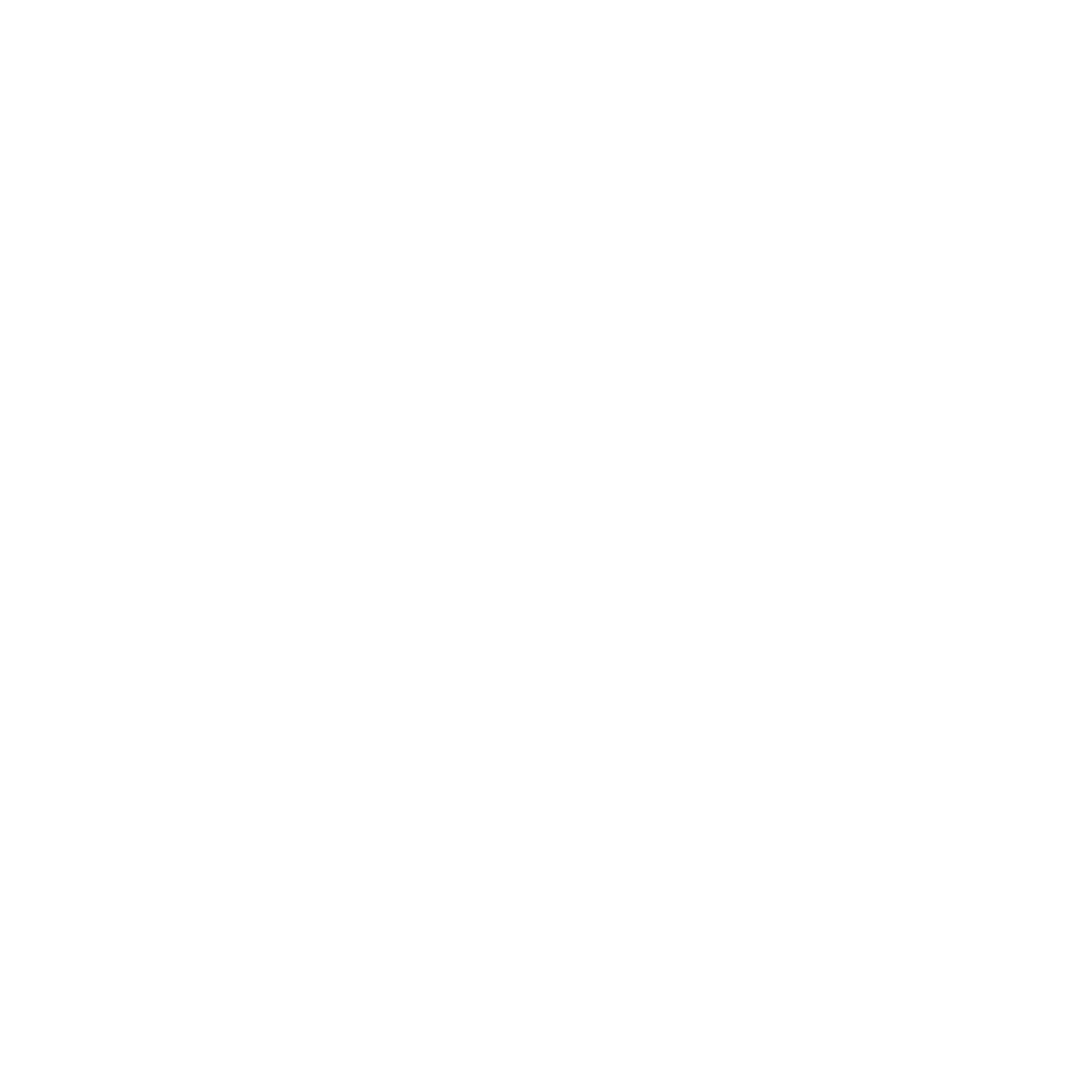

In [191]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection ='3d')

plot3d_majorana(m=1, ax = ax, hierarchy = 1)

ax.text(0,6, ax.get_zlim()[1], 'NH', fontsize =18)
# ax.set_zlim(1e-3, 0.5e-2)

ax.view_init(10,55)
plt.show()